In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
class BusModel(object):
    g = 9.81 # m/s^2 (acceleration of free-fall due to gravity)
    p_a = 1.225 # (density of air) kg/m^3
    C_d = 0.7 # (drag coefficient)
    def __init__(self, M, A_f, P_tire, R_W, lambd=1, n_t=0.8, p_rot_in=0.1):
        self.M = M # Vehicle mass (kg)
        self.M_equ = M * p_rot_in # Rotation inertia (kg)
        self.A_f = A_f # Frontal area (m^2)
        self.P_tire = P_tire # Tire pressure (bars)
        self.R_W = R_W # Wheel radius (m)
        self.lambd = lambd # Final transmission efficiency * gear ratio
        self.n_t = n_t # Overrall transmission efficiency
    
    def P_M(self, V, dV_dT, V_wind=0, alpha=0):
        return self._T_M(V, dV_dT, V_wind, alpha) * self._omega_M(V) # kW
    
    def _omega_M(self, V):
        return V / self.R_W # radians/second
    
    def _T_M(self, V, dV_dT, V_wind, alpha):
        return (self.lambd/self.n_t) * self.R_W * (self._F_total(V, V_wind, alpha) + (self.M + self.M_equ) * dV_dT) # Nm
    
    def _F_total(self, V, V_wind, alpha=0):
        return self._F_a(V, V_wind) + self._F_r(V, alpha) + self._F_g(alpha) # N
    
    def _F_a(self, V, V_wind):
        return 0.5 * self.p_a * self.A_f * self.C_d * np.square(V - V_wind) # N
    
    def _F_r(self, V, alpha):
        return self._C_r(V) * self.M * self.g * np.cos(alpha) # N
    
    def _C_r(self, V):
        return 0.005 + (1 / self.P_tire) * (0.01 + 0.0095 * np.square(V * 3600 / 100000))
    
    def _F_g(self, alpha):
        return self.M * self.g * np.sin(alpha) # N


In [13]:
M = (42 * 80.7) + 13041 # kg
A_f = 2 * 3 # m^2
P_tire = 6.20528 # bar
R_W = 0.5715/2 # m
model = BusModel(M, A_f, P_tire, R_W)

In [ ]:
for csv_filepath in glob.glob("../data/kinematics_data/*.csv"):
    df = pd.read_csv(csv_filepath)
    

In [15]:
jun_26_kinematics_df = pd.read_csv("../data/kinematics_data/2020-06-24_kinematics.csv")
jun_26_kinematics_df.head()

,Unnamed: 0,ID,Timestamp,Route,Next stop,Destination,Bearing,Longitude,Latitude,Time difference (s),Traveled (m),Speed (m/s),Change in Speed (m/s),Acceleration (m/s^2)
0,0,4964,2020-06-24 05:01:28,M14A-SBS,HUDSON ST/W 12 ST,SELECT BUS WEST SIDE via 14 ST,262.61395,-74.005284,40.740057,NaN,NaN,NaN,NaN,NaN
1,1,4964,2020-06-24 05:01:59,M14A-SBS,HUDSON ST/W 12 ST,SELECT BUS WEST SIDE via 14 ST,260.69006,-74.005574,40.738222,31.0,205.500323,6.629043,NaN,NaN
2,2,4964,2020-06-24 05:03:01,M14A-SBS,NaN,SELECT BUS WEST SIDE via 14 ST,261.3268,-74.005661,40.737660,62.0,62.919967,1.014838,-5.614204,-0.090552
3,3,4964,2020-06-24 05:03:31,M14A-SBS,NaN,SELECT BUS WEST SIDE via 14 ST,261.3268,-74.005661,40.737660,30.0,0.000000,0.000000,-1.014838,-0.033828
4,4,4964,2020-06-24 05:04:02,M14A-SBS,NaN,SELECT BUS WEST SIDE via 14 ST,261.3268,-74.005661,40.737660,31.0,0.000000,0.000000,0.000000,0.000000


In [18]:
jun_26_4964_df = jun_26_kinematics_df[jun_26_kinematics_df["ID"] == 4964]

In [ ]:
def extract_power_energy(filepath):
    

In [25]:
powers = model.P_M(jun_26_4964_df["Speed (m/s)"].values, jun_26_4964_df["Acceleration (m/s^2)"].values)
powers = np.nan_to_num(powers)
powers

array([ 0.00000000e+00,  0.00000000e+00, -7.20459549e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.08218506e+03,  7.89674144e+04,  3.61951286e+03,
       -4.75655051e+03,  1.64840833e+04, -1.37002560e+03, -5.82974553e+02,
        2.68851823e+04, -2.52710393e+03, -8.20473152e+02,  1.35307976e+04,
        1.16701814e+03,  1.24493017e+03,  6.46840260e+04, -9.55061679e+03,
        1.49442413e+04, -1.70653232e+03,  6.84106401e+03,  1.41814590e+03,
        3.48913725e+04,  3.84121223e+04, -2.28621647e+03,  4.60841450e+04,
       -2.66162799e+03,  3.79772676e+04,  2.45837836e+03, -5.22178876e+01,
        1.64410777e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

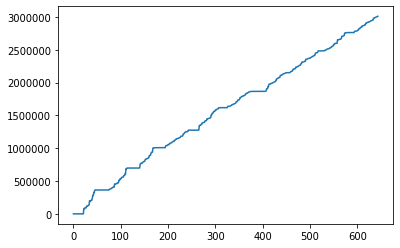

In [26]:
plt.plot(np.cumsum(powers))

In [27]:
powers

array([ 0.00000000e+00,  0.00000000e+00, -7.20459549e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.08218506e+03,  7.89674144e+04,  3.61951286e+03,
       -4.75655051e+03,  1.64840833e+04, -1.37002560e+03, -5.82974553e+02,
        2.68851823e+04, -2.52710393e+03, -8.20473152e+02,  1.35307976e+04,
        1.16701814e+03,  1.24493017e+03,  6.46840260e+04, -9.55061679e+03,
        1.49442413e+04, -1.70653232e+03,  6.84106401e+03,  1.41814590e+03,
        3.48913725e+04,  3.84121223e+04, -2.28621647e+03,  4.60841450e+04,
       -2.66162799e+03,  3.79772676e+04,  2.45837836e+03, -5.22178876e+01,
        1.64410777e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  